In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#Read the data
df = pd.read_csv('iris.csv')
#df['species'].unique()

# Encode the values of species to numeric categories
name_map = {"species":{"setosa": 0, "versicolor": 1, "virginica":2}}
df.replace(name_map, inplace=True)


target = 'species'
features = df.columns.to_list()
features.remove('species')

X = df[features].values

#Extract the classes
y = df[target].values

# data split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_df = pd.DataFrame(X_train, columns=features)
#X_train_df.shape

# Model Training, Prediction And Evaluation
model = RandomForestClassifier(max_depth=3,n_estimators=10,class_weight='balanced')
model.fit(X_train,y_train)
expected = y_test
predicted = model.predict(X_test)
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Global explainations

        feature    weight       std
0  petal_length  0.416334  0.030980
1   petal_width  0.134626  0.032760
2  sepal_length  0.020513  0.004187
3   sepal_width  0.000000  0.000000


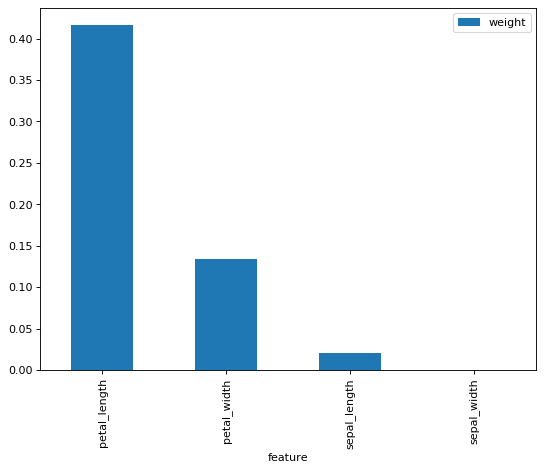

In [20]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, scoring="balanced_accuracy")
perm.fit(X_train, y_train)
feat_imp_df = eli5.explain_weights_df(perm, feature_names=features)
print(feat_imp_df)
fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
feat_imp_df.plot(kind='bar',x='feature',y='weight', ax=ax)
plt.show()

In [21]:
eli5.show_weights(perm, feature_names=features)

Weight,Feature
0.4163 ± 0.0620,petal_length
0.1346 ± 0.0655,petal_width
0.0205 ± 0.0084,sepal_length
0 ± 0.0000,sepal_width


# Local Explainations

In [22]:
print(df.iloc[1:2])
test_sample = df.iloc[1:2,:-1]
eli5.show_prediction(model, test_sample,feature_names=features)

   sepal_length  sepal_width  petal_length  petal_width  species
1           4.9          3.0           1.4          0.2        0


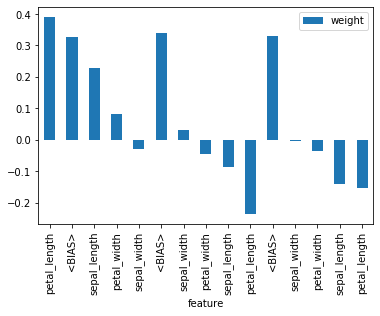

In [23]:
feat_imp_df = eli5.explain_prediction_df(model, test_sample,feature_names=features)
fig, ax = plt.subplots()
feat_imp_df.plot(kind='bar',x='feature',y='weight', ax=ax)
plt.show()